# Make a plot with both redshift and universe age axes using astropy.cosmology

## Authors
Neil Crighton, Stephanie T. Douglas

## Learning Goals
* Plot relationships using `matplotlib`
* Add a second axis to a `matplotlib` plot
* Relate distance, redshift, and age for two different types of cosmology using `astropy.cosmology`

## Keywords
units, physics, cosmology, matplotlib

## Summary

Each redshift corresponds to an age of the universe, so if you're plotting some quantity against redshift, it's often useful show the universe age too.  The relationship between the two changes depending the type of cosmology you assume, which is where `astropy.cosmology` comes in. In this tutorial we'll show how to use the tools in `astropy.cosmology` to make a plot like this:

In [1]:
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

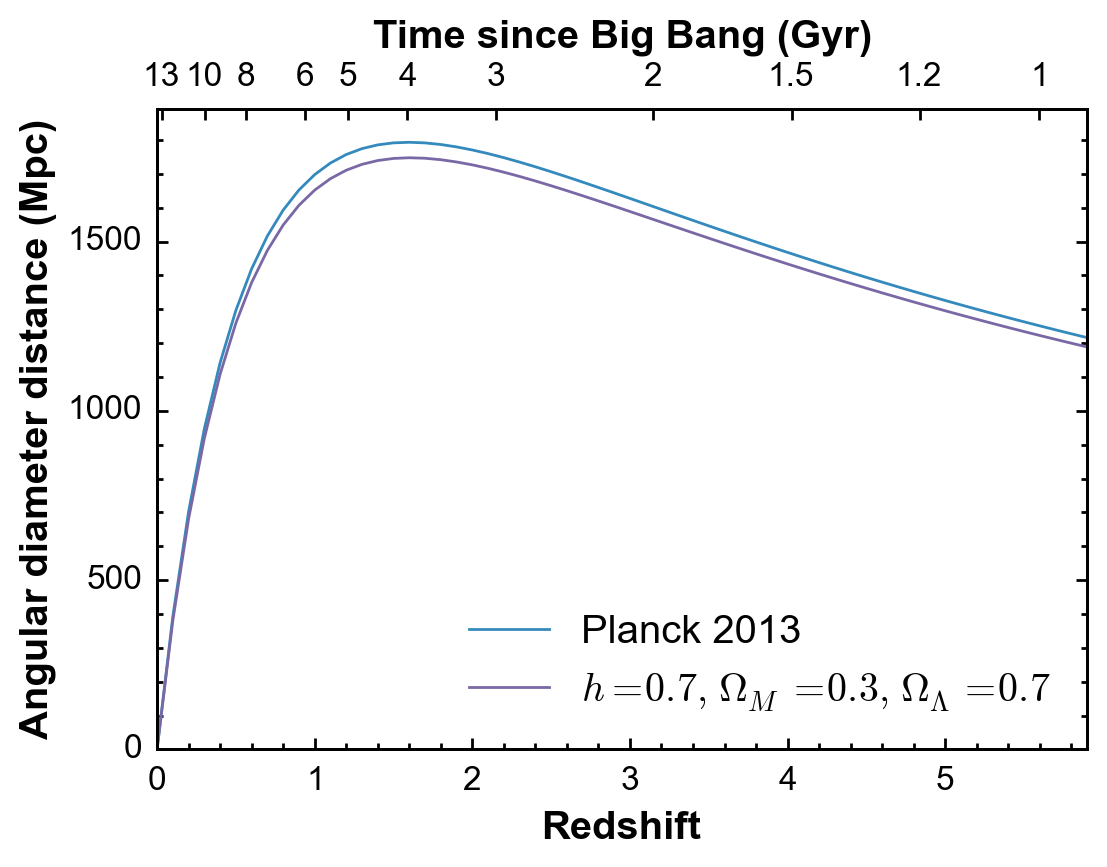

In [2]:
from IPython.display import Image
Image(filename="ang_dist.png", width=500)

We start with a cosmology object. We will make a flat cosmology (which means that the curvature density $\Omega_k=0$)  with a hubble parameter of $70$ km/s/Mpc and matter density $\Omega_M=0.3$ at redshift 0. The `FlatLambdaCDM` cosmology then automatically infers that the dark energy density $\Omega_\Lambda$ must $=0.7$, because $\Omega_M + \Omega_\Lambda + \Omega_k = 1$. 

In [3]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# In this case we just need to define the matter density 
# and hubble parameter at z=0.

# Note the default units for the hubble parameter H0 are km/s/Mpc. 
# We will pass in a `Quantity` object with the units specified. 

cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)

Note that we could instead use one of the built-in cosmologies, like `WMAP9` or `Planck13`, in which case we would just redefine the `cosmo` variable.

Now we need an example quantity to plot versus redshift. Let's use the angular diameter distance, which is the physical transverse distance (the size of a galaxy, say) corresponding to a fixed angular separation on the sky. To calculate the angular diameter distance for a range of redshifts:

In [4]:
import numpy as np
zvals = np.arange(0, 6, 0.1)
dist = cosmo.angular_diameter_distance(zvals)

Note that we passed an array of redshifts to `cosmo.angular_diameter_distance` and it produced a corresponding array of distance values, one for each redshift. Let's plot them:

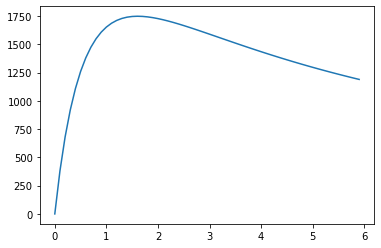

In [5]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)

To check the units of the angular diameter distance, take a look at the unit attribute:

In [6]:
dist.unit

Unit("Mpc")

Now let's put some age labels on the top axis. We're going to pick a series of round age values where we want to place axis ticks. You may need to tweak these depending on your redshift range to get nice, evenly spaced ticks.

In [7]:
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr

To link the redshift and age axes, we have to find the redshift corresponding to each age. The function `z_at_value` does this for us.

In [8]:
from astropy.cosmology import z_at_value
ageticks = [z_at_value(cosmo.age, age) for age in ages]

Now we make the second axes, and set the tick positions using these values.

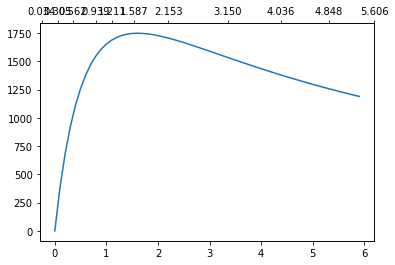

In [9]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)

We have ticks on the top axis at the correct ages, but they're labelled with the redshift, not the age. We can fix this by setting the tick labels by hand. 

[Text(0.03426542424730722, 1, '13'),
 Text(0.30529969870539075, 1, '10'),
 Text(0.5622761997285902, 1, '8'),
 Text(0.9394313081990155, 1, '6'),
 Text(1.2114538180402323, 1, '5'),
 Text(1.586736130025453, 1, '4'),
 Text(2.153211270001333, 1, '3'),
 Text(3.150381753523928, 1, '2'),
 Text(4.035713900198318, 1, '1.5'),
 Text(4.847670846184229, 1, '1.2'),
 Text(5.606047443188422, 1, '1')]

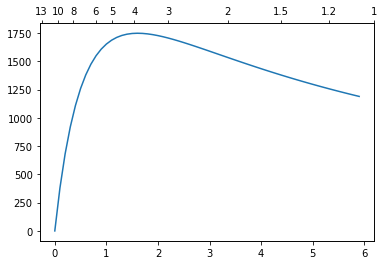

In [10]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])

We need to make sure the top and bottom axes have the same redshift limits. They may not line up properly in the above plot, for example, depending on your setup (the age of the universe should be ~13 Gyr at z=0). 

(0.0, 5.9)

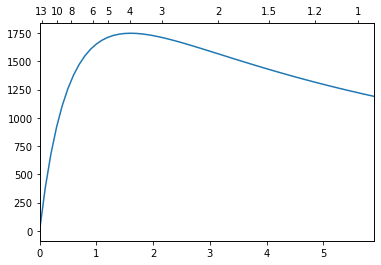

In [11]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)

We're almost done. We just need to label all the axes, and add some minor ticks. Let's also tweak the y axis limits to avoid putting labels right near the top of the plot.

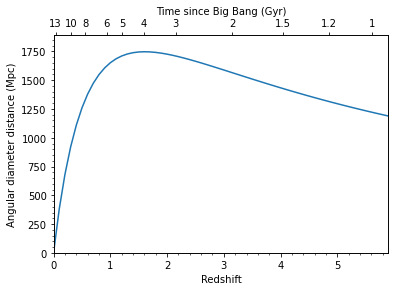

In [12]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.set_ylim(0, 1890)
ax.minorticks_on()

Now for comparison, let's add the angular diameter distance for a different cosmology, from the Planck 2013 results. And then finally, we save the figure to a png file.

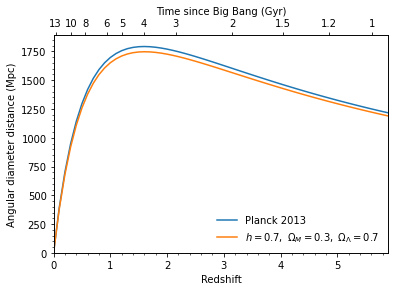

In [13]:
from astropy.cosmology import Planck13
dist2 = Planck13.angular_diameter_distance(zvals)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist2, label='Planck 2013')
ax.plot(zvals, dist, label=
        '$h=0.7,\ \Omega_M=0.3,\ \Omega_\Lambda=0.7$')
ax.legend(frameon=0, loc='lower right')
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.minorticks_on()
ax.set_ylim(0, 1890)
fig.savefig('ang_dist.png', dpi=200, bbox_inches='tight')

`bbox_inches='tight'` automatically trims any whitespace from around the plot edges. 

And we're done!

## Exercise

Well, almost done.  Notice that we calculated the times on the upper axis using the original cosmology, not the new cosmology based on the Planck 2013 results. So strictly speaking, this axis applies only to the original cosmology, although the difference between the two is small. As an exercise, you can try plot two different upper axes, slightly offset from each other, to show the times corresponding to each cosmology. Take a look at the first answer to [this question on Stack Overflow](http://stackoverflow.com/questions/7733693/matplotlib-overlay-plots-with-different-scales) for some hints on how to go about this.